# Problems with Qcirc.png

Reference: https://github.com/qutip/qutip/issues/702#issuecomment-307548166

In [15]:
%matplotlib inline
from qutip import *
from qutip.qip.circuit_latex import _latex_compile
N = 3
qc = QubitCircuit(N)

qc.add_gate("CNOT", targets=[0], controls=[2])

latex_code = qc.latex_code()
print(latex_code)

 &  &  \ctrl{2}  & \qw \\ 
 &  &  \qw  & \qw \\ 
 &  &  \targ  & \qw \\ 



In [24]:
compiled_latex = _latex_compile(latex_code, format='png')
print(compiled_latex)

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\\\x00\x00\x00^\x08\x04\x00\x00\x00\x04.\xbb\xd8\x00\x00\x00\x02bKGD\x00\xff\x87\x8f\xcc\xbf\x00\x00\x00\tpHYs\x00\x00\x00d\x00\x00\x00d\x00\x0f\x96\xc5\xdd\x00\x00\x00\x07tIME\x07\xe3\x03\x0f\x12\x1d\nC\xdc[\x16\x00\x00\nxzTXtRaw profile type icc\x00\x00X\x85\x9d\x97m\x92d\xa9\rE\xff\xb3\n/\x81O\t-\x07\x04\x8a\xf0\xfe7\xe0CVwO\xb7\xdd3c;+\x88\xccz\x0f\x84\x90\xae\xee\x15\xe9\x9f\xee\xe9\x1f|\xeaPI\xf9}V\xc9?>\xf5\xeb\xb7\x1c\xb9\xda\xb5\x8e\xda\xb5\xd7\x9a\xc7\x1c6V\xcd\x7f\xf6IR\xa4i\xd3\xdc\xcb\xc8#w\xff\xd3\x99\x7f\xf1\tv}\x1e\xfdp\xe7\xb4z\xfe\x1fC\x1f\x8f\xfe\xc7\xf9K\xba\x0cm\xd2\xbe\xf9\xf2\xed\x04\xea\x89\x83e\xad\xda?\xff\x17\x9d_/\xeaT%B\xf9\xfb\xf3\xf5\xcdN\xe9Re\xff\xf1|\xf7\xef\xcf\x13\xe1\xfc\x84\xf1\xeb\x7f\x9f?\x16\xe8\xcf\xcf\x8f\xffa\xe8\xe7\xe7\x91\x7f6\xd4\xc9\xcc\x97\xab5\x7f\xed0\xb3c\xe8\xf7\xcf\xffd~\xfa\xf5\xcc\xdf?\xb5\xf6\xf2\x0e,&\xc2\xfbI\xfa\x9b\x84\x08\xc7U\xe1\x8d\x8c\x9a\xb5}\x87F\xb7\xdeRoL"Jo\x1a\xcb\\

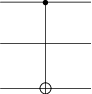

In [25]:
from IPython.display import Image
Image(compiled_latex, embed=True)

In [4]:
_latex_compile??

In [8]:
filename = 'qcirc'

In [18]:
import os

In [19]:
os.system("rm -f %s.tex %s.pdf %s.png" % (filename, filename, filename))

0

In [22]:
with open(filename + ".tex", "w") as file:
    file.write(_latex_template % (_qcircuit_latex_min, latex_code ))

In [ ]:
os.system("pdflatex -interaction batchmode %s.tex" % filename)
os.system("rm -f %s.aux %s.log" % (filename, filename))
os.system("pdfcrop %s.pdf %s-tmp.pdf" % (filename, filename))
os.system("mv %s-tmp.pdf %s.pdf" % (filename, filename))

if format == 'png':
    os.system("convert -density %s %s.pdf %s.png" % (100, filename,
                                                     filename))
    with open("%s.png" % filename, "rb") as f:
        result = f.read()
else:
    os.system("pdf2svg %s.pdf %s.svg" % (filename, filename))
    with open("%s.svg" % filename) as f:
        result = f.read()

# Sandbox

In [11]:
from qutip.qip.circuit_latex import _latex_template, _qcircuit_latex_min

In [12]:
_latex_template

'\n\\documentclass{standalone}\n%s\n\\begin{document}\n\\Qcircuit @C=1cm @R=1cm {\n%s}\n\\end{document}\n'

In [13]:
_qcircuit_latex_min

'\n% Q-circuit version 2\n% Copyright (C) 2004 Steve Flammia & Bryan Eastin\n% Last modified on: 9/16/2011\n% License: http://www.gnu.org/licenses/gpl-2.0.html\n% Original file: http://physics.unm.edu/CQuIC/Qcircuit/Qcircuit.tex\n% Modified for QuTiP on: 5/22/2014\n\\usepackage{xy}\n\\xyoption{matrix}\n\\xyoption{frame}\n\\xyoption{arrow}\n\\xyoption{arc}\n\\usepackage{ifpdf}\n\\entrymodifiers={!C\\entrybox}\n\\newcommand{\\bra}[1]{{\\left\\langle{#1}\\right\\vert}}\n\\newcommand{\\ket}[1]{{\\left\\vert{#1}\\right\\rangle}}\n\\newcommand{\\qw}[1][-1]{\\ar @{-} [0,#1]}\n\\newcommand{\\qwx}[1][-1]{\\ar @{-} [#1,0]}\n\\newcommand{\\cw}[1][-1]{\\ar @{=} [0,#1]}\n\\newcommand{\\cwx}[1][-1]{\\ar @{=} [#1,0]}\n\\newcommand{\\gate}[1]{*+<.6em>{#1} \\POS ="i","i"+UR;"i"+UL **\\dir{-};"i"+DL **\\dir{-};"i"+DR **\\dir{-};"i"+UR **\\dir{-},"i" \\qw}\n\\newcommand{\\meter}{*=<1.8em,1.4em>{\\xy ="j","j"-<.778em,.322em>;{"j"+<.778em,-.322em> \\ellipse ur,_{}},"j"-<0em,.4em>;p+<.5em,.9em> **\\dir{-},"

In [21]:
_latex_compile??